In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [2]:
appartment_list = pd.read_csv("../Apartment-List-Rent-Data-National_2019-9.csv")

In [3]:
appartment_list.head()

Location Location_Type Bedroom_Size  Price_2014_01  Price_2014_02  \
0  National      National       Studio            730            732   
1  National      National          1br            835            838   
2  National      National          2br           1037           1039   
3  National      National          3br           1392           1396   
4  National      National          4br           1623           1627   

   Price_2014_03  Price_2014_04  Price_2014_05  Price_2014_06  Price_2014_07  \
0            734            738            741            744            748   
1            840            844            848            852            857   
2           1043           1047           1052           1057           1063   
3           1401           1407           1413           1419           1428   
4           1632           1639           1647           1654           1663   

   ...  Price_2018_12  Price_2019_01  Price_2019_02  Price_2019_03  \
0  ...            828            827            827            827   
1  ...            948            947            946            947   
2  ...           1176           1175           1174           1175   
3  ...           1579           1578           1577           1578   
4  ...           1840           1839           1838           1839   

   Price_2019_04  Price_2019_05  Price_2019_06  Price_2019_07  Price_2019_08  \
0            831            835            838            839            839   
1            951            955            959            960            960   
2           1180           1185           1190           1191           1191   
3           1585           1592           1599           1600           1600   
4           1847           1855           1863           1865           1864   

   Price_2019_09  
0            838  
1            958  
2           1189  
3           1597  
4           1861  

[5 rows x 72 columns]

In [4]:
life_expectancy_data = pd.read_excel("../IHME_county_data_LifeExpectancy_Obesity_PhysicalActivity_NATIONAL.xlsx")

In [5]:
life_expectancy_data.head()

State   County  Male life expectancy, 1985 (years)  \
0  United States      NaN                                70.8   
1        Alabama      NaN                                69.1   
2        Alabama  Autauga                                68.1   
3        Alabama  Baldwin                                71.1   
4        Alabama  Barbour                                66.8   

   Female life expectancy, 1985 (years)  Male life expectancy, 1990 (years)  \
0                                  77.8                                71.5   
1                                  76.9                                69.4   
2                                  77.0                                68.5   
3                                  78.8                                71.9   
4                                  76.0                                66.7   

   Female life expectancy, 1990 (years)  Male life expectancy, 1995 (years)  \
0                                  78.3                                72.5   
1                                  77.1                                69.9   
2                                  77.0                                69.3   
3                                  79.2                                72.4   
4                                  76.7                                68.4   

   Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
0                                  78.8                                74.1   
1                                  77.2                                71.0   
2                                  77.3                                71.7   
3                                  79.3                                73.9   
4                                  76.9                                70.0   

   Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
0                                  79.2                                74.9   
1                                  77.2                                71.5   
2                                  77.6                                72.5   
3                                  79.2                                73.8   
4                                  76.2                                70.5   

   Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
0                                  79.9                                76.1   
1                                  77.3                                72.4   
2                                  77.4                                73.3   
3                                  79.7                                75.0   
4                                  77.0                                72.2   

   Female life expectancy, 2010 (years)  \
0                                  80.8   
1                                  77.8   
2                                  78.8   
3                                  80.3   
4                                  77.2   

   Difference in male life expectancy, 1985-2010 (years)  \
0                                                5.2       
1                                                3.3       
2                                                5.2       
3                                                3.8       
4                                                5.3       

   Difference in female life expectancy, 1985-2010 (years)  
0                                                3.0        
1                                                0.9        
2                                                1.8        
3                                                1.5        
4                                                1.1

In [7]:
life_expectancy_state_wise = life_expectancy_data.groupby("State").mean()

In [33]:
state_wise_life_expectancy = life_expectancy_data[(life_expectancy_data["County"].isnull()) & (life_expectancy_data["State"] != "United States")].drop(columns=["County"])

In [39]:
state_wise_life_expectancy.head()

State  Male life expectancy, 1985 (years)  \
1       Alabama                                69.1   
69       Alaska                                70.9   
98      Arizona                                71.7   
114    Arkansas                                69.8   
190  California                                71.7   

     Female life expectancy, 1985 (years)  Male life expectancy, 1990 (years)  \
1                                    76.9                                69.4   
69                                   77.7                                72.0   
98                                   78.8                                72.3   
114                                  77.5                                70.2   
190                                  78.3                                72.3   

     Female life expectancy, 1990 (years)  Male life expectancy, 1995 (years)  \
1                                    77.1                                69.9   
69                                   78.8                                72.9   
98                                   79.3                                73.1   
114                                  77.6                                70.6   
190                                  78.8                                73.5   

     Female life expectancy, 1995 (years)  Male life expectancy, 2000 (years)  \
1                                    77.2                                71.0   
69                                   78.7                                74.2   
98                                   79.6                                74.5   
114                                  77.8                                71.8   
190                                  79.6                                75.7   

     Female life expectancy, 2000 (years)  Male life expectancy, 2005 (years)  \
1                                    77.2                                71.5   
69                                   78.9                                75.1   
98                                   79.9                                75.2   
114                                  77.8                                72.2   
190                                  80.3                                76.5   

     Female life expectancy, 2005 (years)  Male life expectancy, 2010 (years)  \
1                                    77.3                                72.4   
69                                   79.7                                75.8   
98                                   80.5                                76.8   
114                                  78.0                                73.0   
190                                  81.2                                78.2   

     Female life expectancy, 2010 (years)  \
1                                    77.8   
69                                   80.1   
98                                   81.7   
114                                  78.5   
190                                  82.5   

     Difference in male life expectancy, 1985-2010 (years)  \
1                                                  3.3       
69                                                 4.9       
98                                                 5.1       
114                                                3.2       
190                                                6.5       

     Difference in female life expectancy, 1985-2010 (years)  
1                                                  0.9        
69                                                 2.3        
98                                                 2.9        
114                                                1.0        
190                                                4.2

In [35]:
state_wise_life_expectancy.corr()

Male life expectancy, 1985 (years)  \
Male life expectancy, 1985 (years)                                            1.000000   
Female life expectancy, 1985 (years)                                          0.953072   
Male life expectancy, 1990 (years)                                            0.977836   
Female life expectancy, 1990 (years)                                          0.978054   
Male life expectancy, 1995 (years)                                            0.970460   
Female life expectancy, 1995 (years)                                          0.967459   
Male life expectancy, 2000 (years)                                            0.929522   
Female life expectancy, 2000 (years)                                          0.895642   
Male life expectancy, 2005 (years)                                            0.870365   
Female life expectancy, 2005 (years)                                          0.828601   
Male life expectancy, 2010 (years)                                            0.740708   
Female life expectancy, 2010 (years)                                          0.719254   
Difference in male life expectancy, 1985-2010 (...                           -0.290758   
Difference in female life expectancy, 1985-2010...                           -0.072515   

                                                    Female life expectancy, 1985 (years)  \
Male life expectancy, 1985 (years)                                              0.953072   
Female life expectancy, 1985 (years)                                            1.000000   
Male life expectancy, 1990 (years)                                              0.905515   
Female life expectancy, 1990 (years)                                            0.974290   
Male life expectancy, 1995 (years)                                              0.888386   
Female life expectancy, 1995 (years)                                            0.947453   
Male life expectancy, 2000 (years)                                              0.845806   
Female life expectancy, 2000 (years)                                            0.871000   
Male life expectancy, 2005 (years)                                              0.787299   
Female life expectancy, 2005 (years)                                            0.789558   
Male life expectancy, 2010 (years)                                              0.654649   
Female life expectancy, 2010 (years)                                            0.665457   
Difference in male life expectancy, 1985-2010 (...                             -0.348086   
Difference in female life expectancy, 1985-2010...                             -0.193600   

                                                    Male life expectancy, 1990 (years)  \
Male life expectancy, 1985 (years)                                            0.977836   
Female life expectancy, 1985 (years)                                          0.905515   
Male life expectancy, 1990 (years)                                            1.000000   
Female life expectancy, 1990 (years)                                          0.962139   
Male life expectancy, 1995 (years)                                            0.989969   
Female life expectancy, 1995 (years)                                          0.945474   
Male life expectancy, 2000 (years)                                            0.913004   
Female life expectancy, 2000 (years)                                          0.848740   
Male life expectancy, 2005 (years)                                            0.848685   
Female life expectancy, 2005 (years)                                          0.784197   
Male life expectancy, 2010 (years)                                            0.698542   
Female life expectancy, 2010 (years)                                          0.664282   
Difference in male life expectancy, 1985-2010 (...                           -0.323034   
Difference in female life expectancy, 1985-2010...          

In [51]:
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(state_wise_life_expectancy.drop(columns = ["State"]).values)

In [52]:
pca.explained_variance_ratio_

array([0.82827002, 0.14706311])

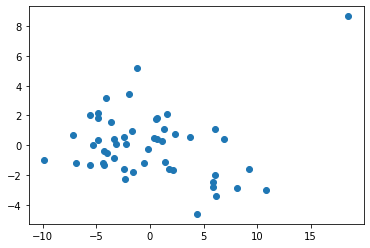

In [59]:
plt.scatter(pca_result[:,0],pca_result[:,1])

In [82]:
alcohol_data = pd.read

State                                                      District of Columbia
Male life expectancy, 1985 (years)                                         64.3
Female life expectancy, 1985 (years)                                         74
Male life expectancy, 1990 (years)                                         61.2
Female life expectancy, 1990 (years)                                       73.2
Male life expectancy, 1995 (years)                                         62.7
Female life expectancy, 1995 (years)                                       74.1
Male life expectancy, 2000 (years)                                         68.3
Female life expectancy, 2000 (years)                                       76.2
Male life expectancy, 2005 (years)                                           70
Female life expectancy, 2005 (years)                                         77
Male life expectancy, 2010 (years)                                         73.7
Female life expectancy, 2010 (years)    